# Что должно уметь делать множество


## Добавлять элемент
## Проверять наличие элемента
## Удалять элемент

## Как устроено множество?
### 1) Придумаем какую-нибудь функцию, которая сопоставляет каждому элементу множества какое-либо небольшое число.(хеш фукнция)
### 2) Вычислим функцию от элемента
### 3) Положим элемент в список с номером, равным значению функции.

## Пример функции добавления для чисел.
### Функция - последнаяя цифра числа (x%10)
### Вычислим функцию от элемента
### Положим элемент в список с номером, равным значению функции.

Когда функция от разных элементов дает одинаковые значения, то такая ситуация называется колизией. Создаем 10 списков с числами по остатку от деления на 10.


### Перебор множества из N элементов осуществляетя за О(N + K).


Элементы в множестве не хранятся в порядке возрастания, это получается, потому что числа больше чем значения хеш-функций, а если брать только маленькие числа, то они будут во возрастанию.


### Операция присваивания медленнее, чем операция чтения.
### При удалении элемента из множества, мы берем и записываем значение последнего элемента в данном списке на место удаляемого, а потом удаляем последний. Нам не важно как хранятся значения внутри наших списков.

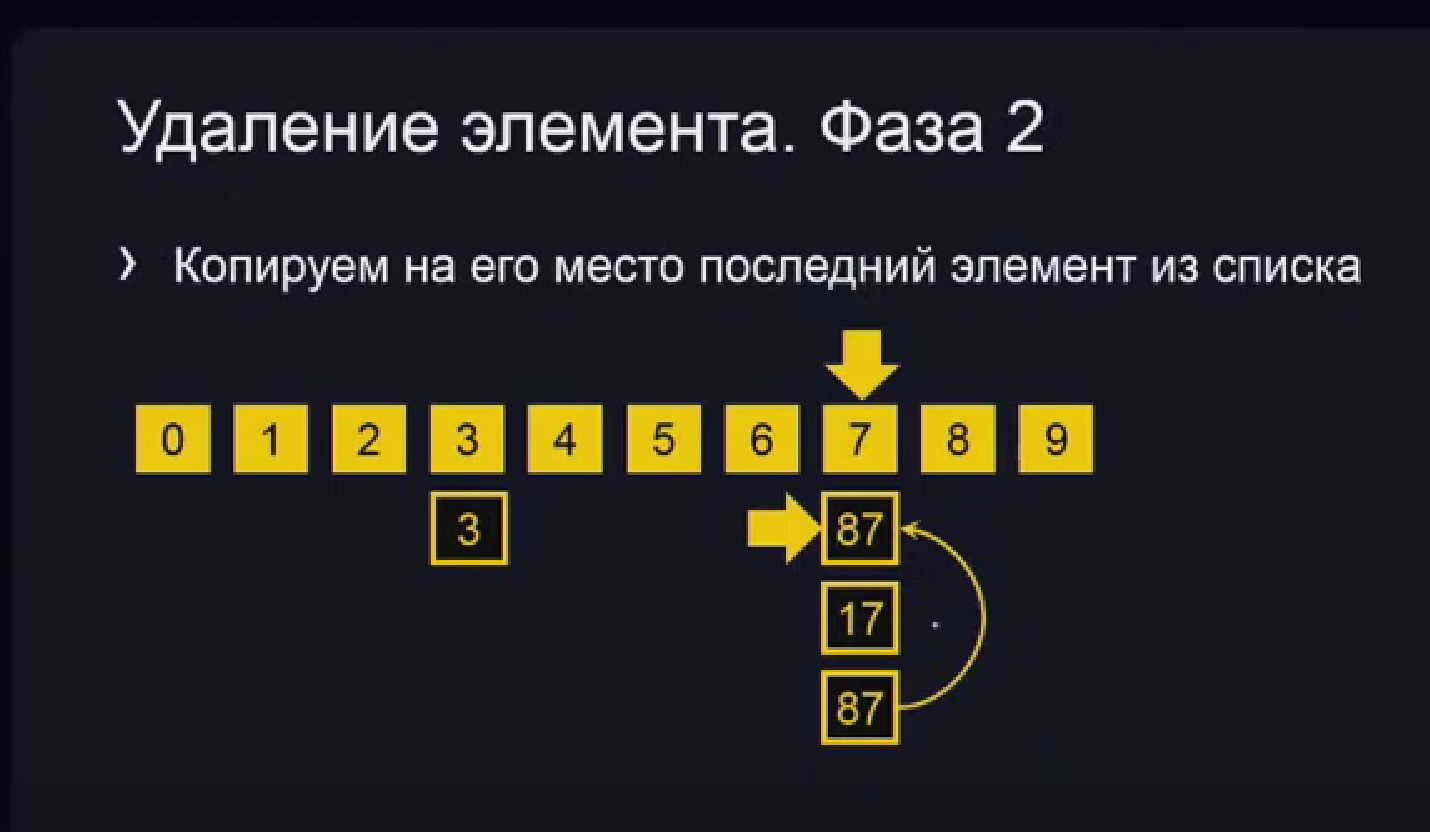

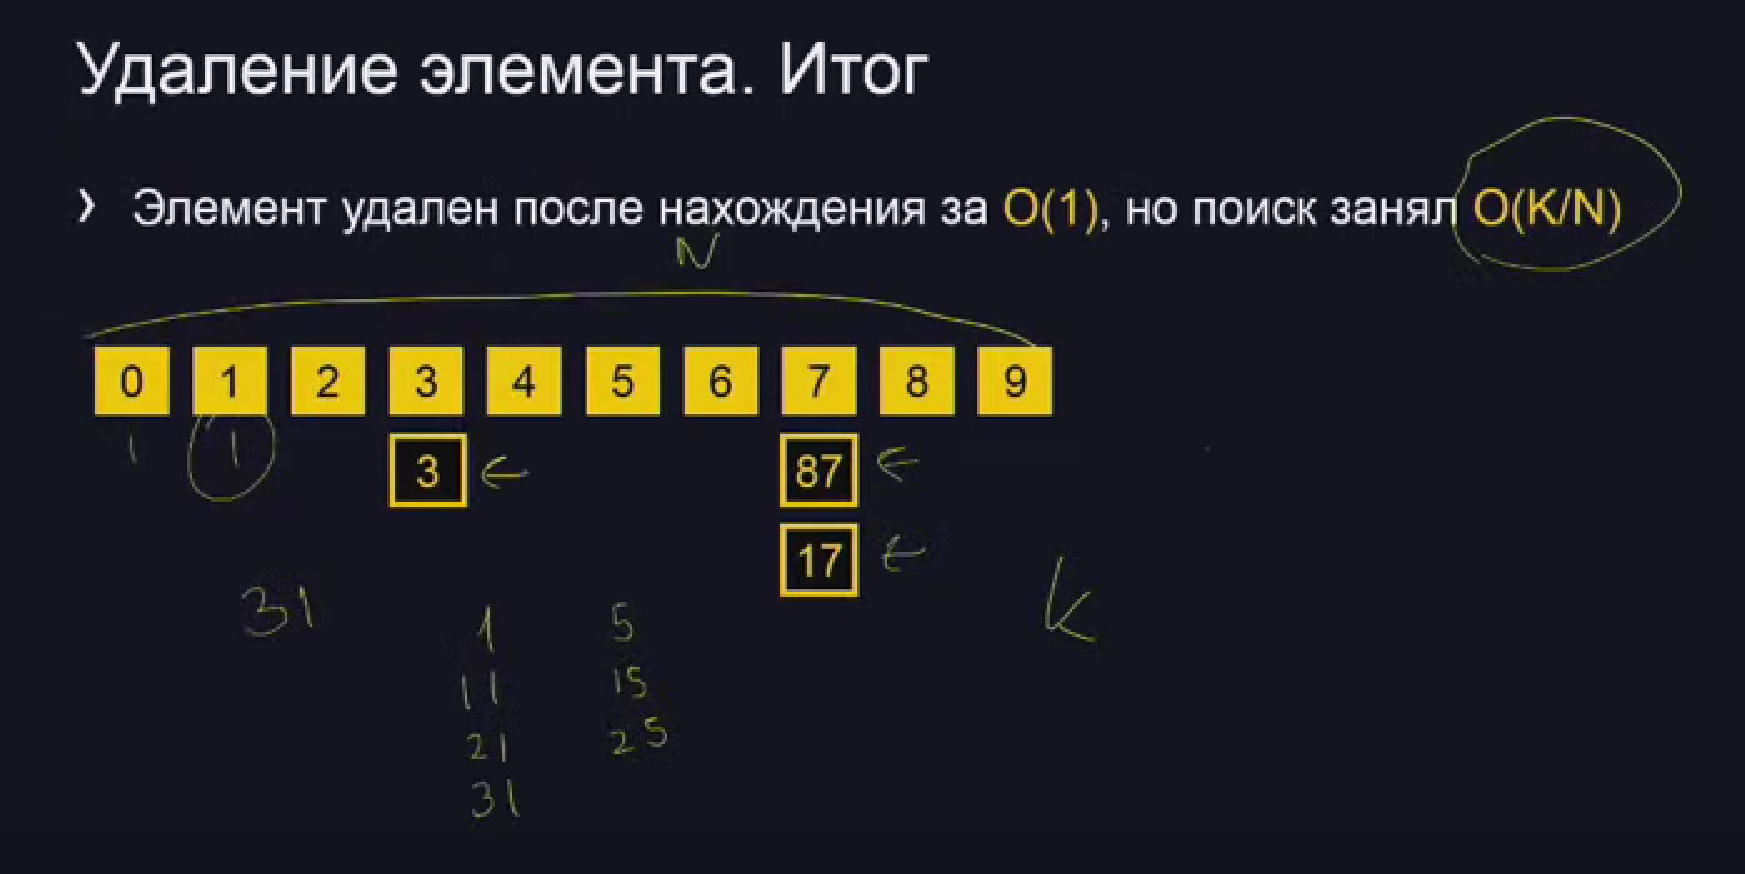

### Доступ по индексу осуществляетя за О(1). Потом, т.к мы рассматриваем средний случай, то взяв 20 элементов в наше множество, мы получим, что в каждом списке располагаются по 2 числа. K = 20, N = 10( кол-во списков), и в худшем случае мы за 2 действия (K/ N) найдем наш элемент в конкретном списке. По итогу получается О(1 + K/N) = О (K/N)

# Реализация множества(Мультимножество)

In [21]:
setsize = 10 # 10 списков, в которых у нас будут храниться элементы
m = [[] for i in range(10)] # вложенный список
def add(x):
    m[x % setsize].append(x)
def find(x):
    for el in m[x % setsize]:
        if el == x:
            return True
    return False
def delete(x):
    m_ = m[x & setsize]
    for i in range(len(m_)):
        if m_[i] == x:
            m_[i], m_[len(m_) - 1] = m_[len(m_) - 1], m_[i]
            m_.pop()
            return


[[], [], [], [], [], [], [], [], [], []]

Мы релизовали мультимножество, то есть множество, в котором элементы могут встречаться несколько раз, чтобы этого избежать достаточно лишь в функции add(x) сделать проверку на find(x), что этот элемент уже присутсвует в множестве и его добавлять не надо.


## Термины
### F(X) = X % setsize - хеш-функция
### m(список списков) - хеш-таблица
### Совпадение значений хеш-функции для разных параметров - коллизия.

## Что можно хранить в множестве эффективно?
### Вообще говоря хранить можно что угодно - в компьютере все состоит из чисел.
### Эффективно - только неизменяемые объекты!
### Для неизменяемых объектов можно посчитать значение хеш-функции при их создании
### Хеш-функция должна давать равномерное распределение.

## Проблемы с хеш-таблицей.
### Слишком большой размер - ест много памяти О(N)
### Слишком маленький размер - большой коэффициент заполнения и медленный поиск и удаление О(K/N)
### Хочется иметь разумный баланс, например коэффициент заполнения не больше едицины(т.к K<=N). Тогда все операции в среднем будут занимать О(1).

## Решение проблемы с хеш-таблицей.
### Когда таблица наполнится - увеличим ее размер вдвое и перестроим!

## Сложность добавления N элементов О(N^2)?
### Возьмем таблицу с начальным размером 1
### Будем добавлять N = 2^p элементов
### На каждом (?) шаге может произойти перестроение таблицы за О(N)

## Сложность добавления N элементов О(N * logN)?
### Возьмем таблицу с начальным размером 1
### Будем добавлять N = 2^p элементов, p = LogN
### Только на P шагах(когда размер таблицы равен очередной степени двойки) может произойти перестроение таблицы за О(N)

Получается, что если расширить список каждый раз в 2 раза, то это занимает О(N), а расширений всего у нас logN ->> сложность составит О(N*logN)

## Сложность добавления N элементов О(N)
### 1 + 2 + 4 +...+ 2^p = 2*2^p - 1 = 2N - 1 = О(N)

Имеется в виду, что на 1 шаге мы копируем 1 элемент из нашей таблицы, на втором шаге 2, и так далее до p-го шага. То есть если посчитать сложность на самом деле, то получается расширение за О(N). P.S операция копирования списка занимает О(len(списка))

### В Python списки после заполнения также расширяются вдвое и копируются т.к есть операция добавить в конец.

## Амортизированная сложность
### Амортизированная сложность - среднее время выполнения операции(условно)
### У нас амортизированная сложность операции О(1) - всего было N операций и суммарно на это ушло О(N)
### В худшем случае отдельная операция выполняется за О(N) - может не подходить для систем реального времени.

Объяснение последнего пункта заключается в том, что в реальном времени когда(условно) беспилотному автомобилю предстоит остановиться при виде человека, он начнет расширять свою хеш таблицу и может привести к печальным последствиям в связи с задержкой выполения.


## Задача. Дана последовательность из N чисел и число X, вывести 2 разных числах, сумма которых даст Х.

## Решение за О(N)

In [23]:
n = int(input())
X = int(input())
m = [int(x) for x in input().split()]
set_ = set()
for el in m:
    if X - el in set_:
        print(el, X - el)
        break
    set_.add(el)

    

10
8
1 2 3 4 5 6 7 8 9 10
5 3


## Задача. Дань словарь из N слов, длина каждого не превосходит K.
### В записи каждого из M слов текста (каждое длиной до K) может быть пропущена одна буква. Для каждого слова сказать, входит ли оно (возможно, с одной пропущенной буквой), в словарь.

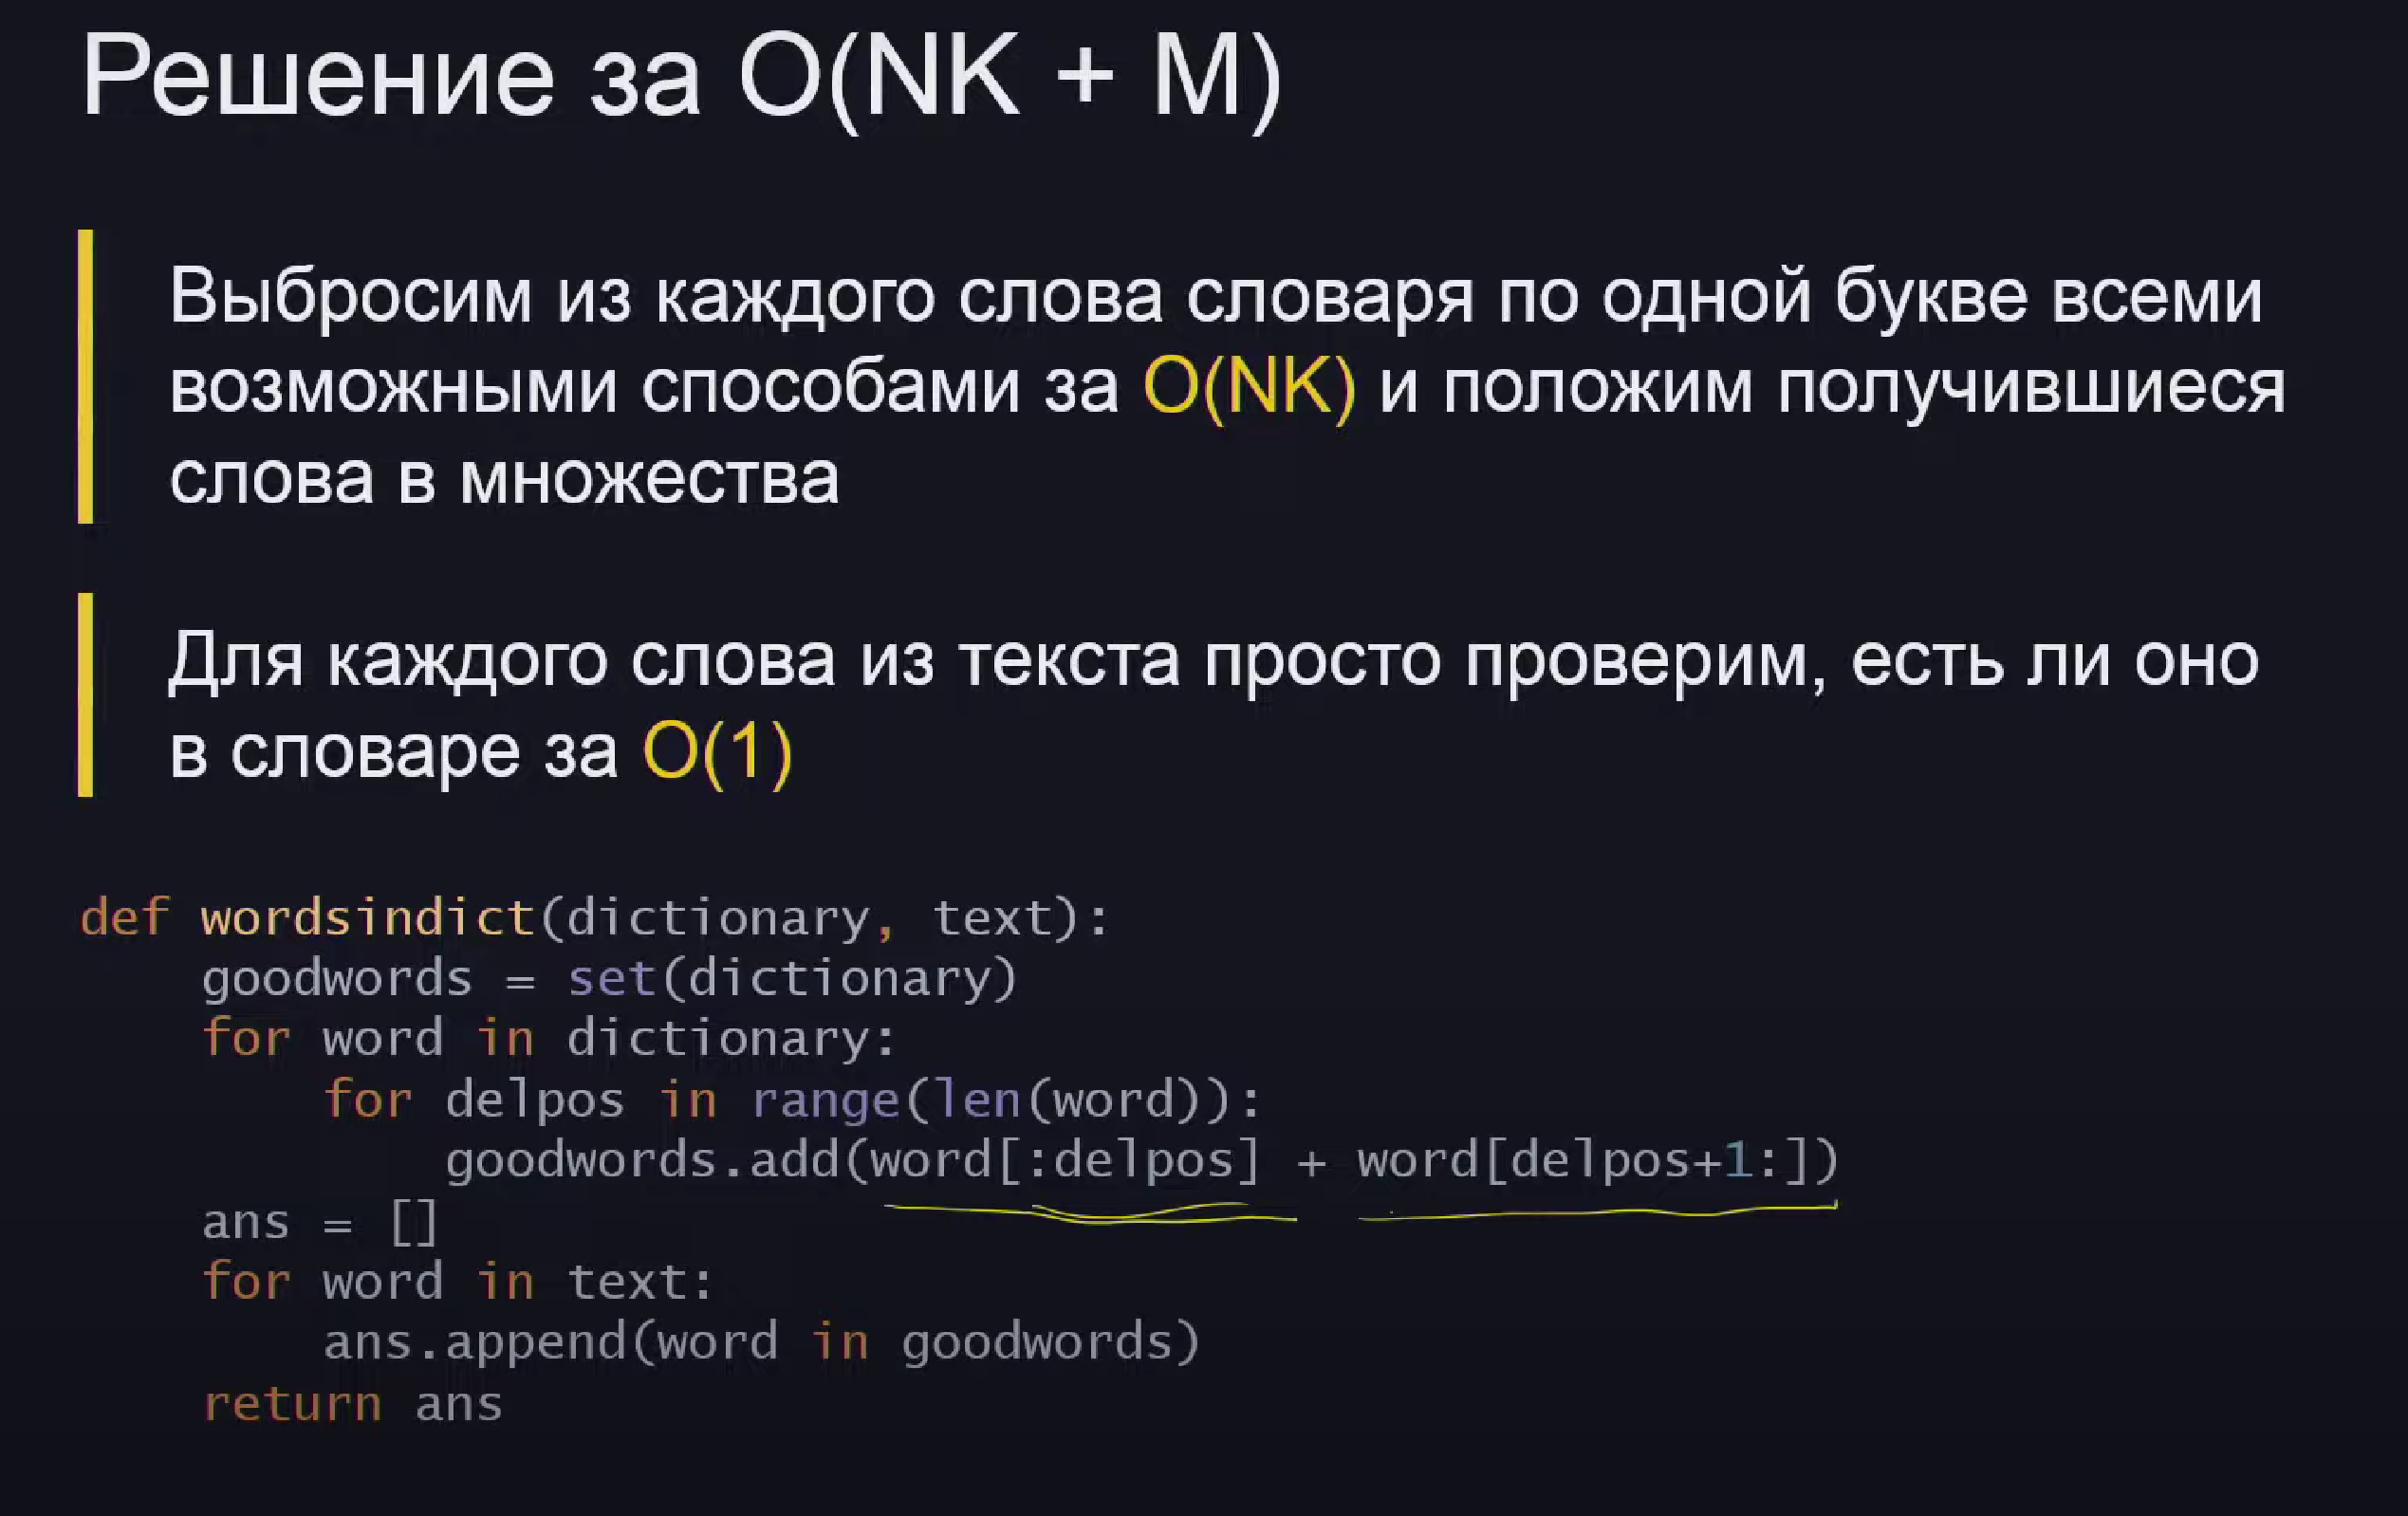

In [3]:
d = {1:"1", 2:"3r2", 0 :1}
s = set(d)
print(s)

{0, 1, 2}
